In [264]:
import pandas as pd
import numpy as np
import sys
from causalgraphicalmodels import CausalGraphicalModel
from sklearn.model_selection import train_test_split
import dowhy
from dowhy import CausalModel
from IPython.display import Image, display


import warnings
warnings.filterwarnings('ignore')


In [265]:
df = pd.read_csv("../data/data.csv")
#encode
df['diagnosis']=df['diagnosis'].map({'B':1,'M':0})
df = df.iloc[: , :-1]
df = df.iloc[: , 1:]
df_1=df.copy()

df_1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [266]:
y = df.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [267]:
y

array([370, 426, 406,  98, 418, 159, 376, 233, 192, 160, 324, 322, 394,
       323, 234, 273, 280, 328, 410, 222, 196,  28, 310, 436, 341, 351,
       274, 381, 308, 362, 382, 125, 347, 398, 328, 343, 259, 194, 295,
       217, 213,  73, 391, 206, 201, 383,   4, 201, 137, 218, 122, 227,
       131, 375, 301, 106, 397, 282, 195,   9,  49,   8, 259,  19, 170,
       285,  27,  91,  17, 176, 388,  14, 353, 239, 151, 326, 221, 373,
       415, 181, 100, 208, 451, 392, 134, 379, 270, 390, 154, 279, 278,
       311, 205, 214, 299, 417, 142,  41, 109, 266, 225,   0, 142,  43,
        58, 197, 113, 154, 443,  94,  40, 167, 260,  59,  11, 130,  15,
       289, 322, 369,  97, 384, 449, 271, 209, 242, 225, 389, 301, 408,
       143, 312, 330, 319, 378, 175, 119,  99, 292,  88,  37, 327,  99,
       185,  65, 129, 123, 292, 267, 235, 192,   5,  36,  81, 199, 148,
       364, 345, 138,  70, 121, 396, 404, 153, 446, 294,  66, 344, 360,
       294, 152, 212, 312,  78,  63,  10,  44, 338, 193, 178, 45

In [268]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [269]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Given that from usaual mathimatics and the corrilation we did in EDA part we see  radius which can affect the
value of perimeter,area, compactness,concavity,smoothness and so on.So using this we can formulate questions:
    
    1. if radius_mean getting low then breast tumors being diagnosed as benign.
    
    2. if texture dencity increase then breast tumors being diagnosed.
    


In [270]:

df['radius_min'] = df['radius_mean'].apply(lambda x: True if x > 19 else False)


In [271]:
train,test = train_test_split(df,test_size=0.1)

In [272]:
train_features = {'diagnosis','radius','area','perimeter','compactness','smoothness','concave points','concavity'}
train_columns = [col for col in df 
                      if any(feature in col for feature in train_features)]
train_columns

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'radius_min']

The stronger the correlation, the more difficult it is to change one variable without changing another. 
It becomes difficult for the model to estimate the relationship between each independent variable and the dependent
variable independently
because the independent variables tend to change in unison. So we need to drop features that have high positive corrilation.

In [273]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_min
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872,-0.489983
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.736316
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.281748
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.738648
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.778644
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.160431
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.402526
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.556253
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.654435
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.160902


In [274]:
training = df[train_columns]
training = training.drop(training.filter(regex = '_worst').columns,axis=1)
training = training.drop(training.filter(regex = '_se').columns,axis=1)
training.rename(columns={'concave points_mean':'concave_points_mean'},inplace=True)
training.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,radius_min
0,0,17.99,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,False
1,0,20.57,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,True
2,0,19.69,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,True
3,0,11.42,77.58,386.1,0.14250,0.28390,0.2414,0.10520,False
4,0,20.29,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,True


In [275]:
causal_graph = """
digraph{
radius_mean;
perimeter_mean;
area_mean;
smoothness_mean;
compactness_mean;
concavity_mean;
concave_points_mean;
U[label="Unobserved Confounders"];
radius_mean -> perimeter_mean;radius_mean -> area_mean;radius_mean -> smoothness_mean;radius_mean->radius_min;area_mean->compactness_mean;
perimeter_mean->compactness_mean;concave_points_mean->concavity_mean;
U->compactness_mean;U->smoothness_mean;U->concavity_mean;U->radius_min;U->diagnosis;
compactness_mean->diagnosis;smoothness_mean->diagnosis;concavity_mean->diagnosis;radius_min->diagnosis;
U->concave_points_mean;radius_mean ->U
}
"""

In [276]:
model= CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='radius_min',
        outcome='diagnosis')

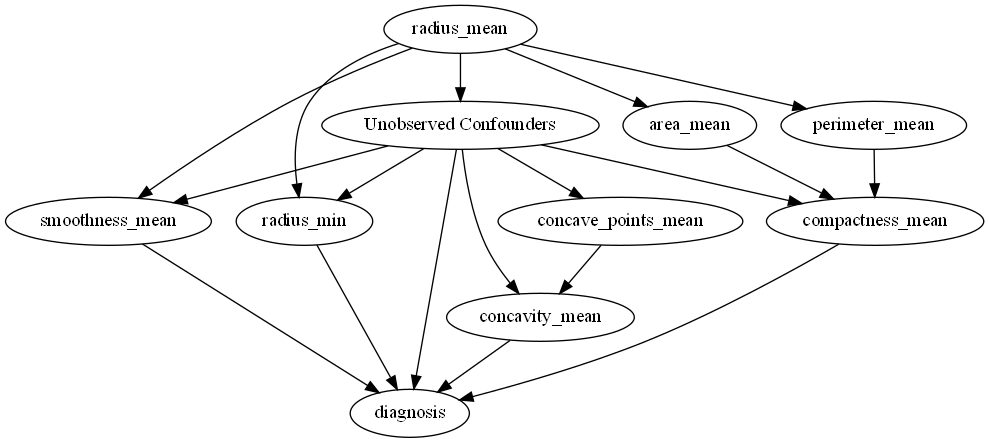

In [277]:
model.view_model()
display(Image(filename="causal_model.png"))


In [278]:
#causal effect
estimands = model.identify_effect()
print(estimands)

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(diagnosis|perimeter_mean,smoothness_mean,radius_mean,
d[radiusₘᵢₙ]                                                                  

                                                               
concave_points_mean,concavity_mean,compactness_mean,area_mean))
                                                               
Estimand assumption 1, Unconfoundedness: If U→{radius_min} and U→diagnosis then P(diagnosis|radius_min,perimeter_mean,smoothness_mean,radius_mean,concave_points_mean,concavity_mean,compactness_mean,area_mean,U) = P(diagnosis|radius_min,perimeter_mean,smoothness_mean,radius_mean,concave_points_mean,concavity_mean,compactness_mean,are

In [279]:
#Causal Effect Estimation using statistical method
estimate = model.estimate_effect(estimands,method_name = "backdoor.propensity_score_weighting")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(diagnosis|perimeter_mean,smoothness_mean,radius_mean,
d[radiusₘᵢₙ]                                                                  

                                                               
concave_points_mean,concavity_mean,compactness_mean,area_mean))
                                                               
Estimand assumption 1, Unconfoundedness: If U→{radius_min} and U→diagnosis then P(diagnosis|radius_min,perimeter_mean,smoothness_mean,radius_mean,concave_points_mean,concavity_mean,compactness_mean,area_mean,U) = P(diagnosis|radius_min,perimeter_mean,smoothness_mean,radius_mean,concave_points_mean,concavity_mean,compactness_mean,area_mean)

## Realized estimand
b: diagnosis~radius_min+perimeter_mean+smoothness_mean+radius_

In [280]:
#Logistic regression estimate
import statsmodels.api as sm
causal_estimate = model.estimate_effect(estimands,
                                        method_name="backdoor.generalized_linear_model",
                                       confidence_intervals=False,
                                       test_significance=False,
                                        method_params = {
                                            'num_null_simulations':10,
                                            'num_simulations':10,
                                            'num_quantiles_to_discretize_cont_cols':10,
                                            'fit_method': "statsmodels",
                                            'glm_family': sm.families.Binomial(), # logistic regression
                                            'need_conditional_estimates':False
                                        },
                                       )
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(diagnosis|perimeter_mean,smoothness_mean,radius_mean,
d[radiusₘᵢₙ]                                                                  

                                                               
concave_points_mean,concavity_mean,compactness_mean,area_mean))
                                                               
Estimand assumption 1, Unconfoundedness: If U→{radius_min} and U→diagnosis then P(diagnosis|radius_min,perimeter_mean,smoothness_mean,radius_mean,concave_points_mean,concavity_mean,compactness_mean,area_mean,U) = P(diagnosis|radius_min,perimeter_mean,smoothness_mean,radius_mean,concave_points_mean,concavity_mean,compactness_mean,area_mean)

## Realized estimand
b: diagnosis~Sigmoid(radius_min+perimeter_mean+smoothness_mean

In [281]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                control_value = 0,
                treatment_value = 1,
                target_units = lambda df: df["X0"]>1,
                confidence_intervals=False,
                method_params={
                    "init_params":{'model_y':GradientBoostingRegressor(),
                                   'model_t': GradientBoostingRegressor(),
                                   'model_final':LassoCV(),
                                   'featurizer':PolynomialFeatures(degree=1, include_bias=True)},
                    "fit_params":{}}
                                        )

NameError: name 'identified_estimand' is not defined

# Testing  validity of our assumption

In [240]:
#Random Common Cause
#adds an independent random variable as a common cause to the train data
#if the assumption was correct, the estimation should not change.

refute_train = model.refute_estimate(estimands,estimate, "random_common_cause")
print(refute_train)

Refute: Add a Random Common Cause
Estimated effect:-0.6604384423272592
New effect:-0.6604384423272592



In [241]:
#Data Subset Refuter
#replaces the given dataset with a randomly selected subset
#if the assumption was correct, the estimation should not change that much.

refute_train = model.refute_estimate(estimands,estimate,"data_subset_refuter")
print(refute_train)

Refute: Use a subset of data
Estimated effect:-0.6604384423272592
New effect:-0.6590182538577224
p value:0.36



In [242]:
0.6612617333976643 - 0.6604384423272592

In [243]:
#Placebo Treatment
#replaces the true treatment variable with an independent random variable
#if the assumption was correct, the estimate should go close to zero.

refute_train = model.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refute_train)

Refute: Use a Placebo Treatment
Estimated effect:-0.6604384423272592
New effect:0.0010624673849260824
p value:0.47



# Conclusion

Observing the three treatment above we can say that for the "mean" features, low radius mean has a causal effect on the breast cancer diagnosis

# 2. Standard error casual effect

A high standard error shows that sample means are widely spread around the population mean—your sample
may not closely represent your population'

Assumption: if texture standard error .cancer being benign.

In [137]:
df['texture_se'].describe()

count    569.000000
mean       1.216853
std        0.551648
min        0.360200
25%        0.833900
50%        1.108000
75%        1.474000
max        4.885000
Name: texture_se, dtype: float64

In [244]:
train,test = train_test_split(df,test_size=0.1)

In [245]:
train_features = {'diagnosis','radius','area','perimeter','compactness','smoothness','concave points','concavity','texture'}
train_columns = [col for col in df 
                      if any(feature in col for feature in train_features)]
train_columns

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'radius_min',
 'texture_min']

In [246]:
df['texture_min'] = df['texture_se'].apply(lambda x: True if x < 1.5 else False)

In [247]:
training = df[train_columns]
training = training.drop(training.filter(regex = '_worst').columns,axis=1)
training = training.drop(training.filter(regex = '_mean').columns,axis=1)
training.rename(columns={'concave points_se':'concave_points_se'},inplace=True)
training.head()

,diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,radius_min,texture_min
0,0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,False,True
1,0,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,True,True
2,0,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,True,True
3,0,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,False,True
4,0,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,True,True


In [248]:
causal_graph = """
digraph{
radius_se;
perimeter_se;
area_se;
smoothness_se;
compactness_se;
concavity_se;
concave_points_se;
U[label="Unobserved Confounders"];
radius_se -> perimeter_se;radius_se -> area_se;radius_se -> smoothness_se;radius_se->texture_min;area_se->compactness_se;
perimeter_se->compactness_se;concave_points_se->concavity_se;
U->compactness_se;U->smoothness_se;U->concavity_se;U->texture_min;U->diagnosis;
compactness_se->diagnosis;smoothness_se->diagnosis;concavity_se->diagnosis;texture_min->diagnosis;
U->concave_points_se;radius_se ->U
}
"""

In [249]:
model_1= CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='texture_min',
        outcome='diagnosis')

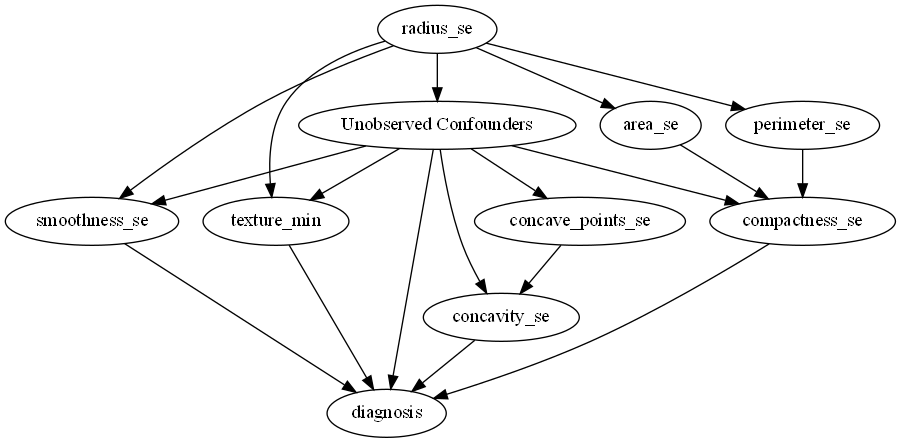

In [263]:
model_1.view_model()
display(Image(filename="causal_model.png"))

In [251]:
#causal effect
estimands = model_1.identify_effect()
print(estimands)

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(diagnosis|area_se,compactness_se,concave_points_se,r
d[textureₘᵢₙ]                                                                 

                                                  
adius_se,perimeter_se,smoothness_se,concavity_se))
                                                  
Estimand assumption 1, Unconfoundedness: If U→{texture_min} and U→diagnosis then P(diagnosis|texture_min,area_se,compactness_se,concave_points_se,radius_se,perimeter_se,smoothness_se,concavity_se,U) = P(diagnosis|texture_min,area_se,compactness_se,concave_points_se,radius_se,perimeter_se,smoothness_se,concavity_se)

### Estimand : 2
Estimand name: iv
No such variable fou

In [252]:
#Causal Effect Estimation using statistical method
estimate = model_1.estimate_effect(estimands,method_name = "backdoor.propensity_score_weighting")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(diagnosis|area_se,compactness_se,concave_points_se,r
d[textureₘᵢₙ]                                                                 

                                                  
adius_se,perimeter_se,smoothness_se,concavity_se))
                                                  
Estimand assumption 1, Unconfoundedness: If U→{texture_min} and U→diagnosis then P(diagnosis|texture_min,area_se,compactness_se,concave_points_se,radius_se,perimeter_se,smoothness_se,concavity_se,U) = P(diagnosis|texture_min,area_se,compactness_se,concave_points_se,radius_se,perimeter_se,smoothness_se,concavity_se)

## Realized estimand
b: diagnosis~texture_min+area_se+compactness_se+concave_points_se+radius_se+perimeter_se+smoothness_se+concavity_se
Target uni

In [254]:
#Logistic regression estimate
import statsmodels.api as sm
causal_estimate = model_1.estimate_effect(estimands,
                                        method_name="backdoor.generalized_linear_model",
                                       confidence_intervals=False,
                                       test_significance=False,
                                        method_params = {
                                            'num_null_simulations':10,
                                            'num_simulations':10,
                                            'num_quantiles_to_discretize_cont_cols':10,
                                            'fit_method': "statsmodels",
                                            'glm_family': sm.families.Binomial(), # logistic regression
                                            'need_conditional_estimates':False
                                        },
                                       )
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(diagnosis|area_se,compactness_se,concave_points_se,r
d[textureₘᵢₙ]                                                                 

                                                  
adius_se,perimeter_se,smoothness_se,concavity_se))
                                                  
Estimand assumption 1, Unconfoundedness: If U→{texture_min} and U→diagnosis then P(diagnosis|texture_min,area_se,compactness_se,concave_points_se,radius_se,perimeter_se,smoothness_se,concavity_se,U) = P(diagnosis|texture_min,area_se,compactness_se,concave_points_se,radius_se,perimeter_se,smoothness_se,concavity_se)

## Realized estimand
b: diagnosis~Sigmoid(texture_min+area_se+compactness_se+concave_points_se+radius_se+perimeter_se+smoothness_se+concavity_se+te

# Testing validity of our assumption

In [256]:
#Random Common Cause
#adds an independent random variable as a common cause to the train data
#if the assumption was correct, the estimation should not change.

refute_train = model_1.refute_estimate(estimands,estimate, "random_common_cause")
print(refute_train)

Refute: Add a Random Common Cause
Estimated effect:-0.07407164116266085
New effect:-0.07133993873505551



In [257]:
#Data Subset Refuter
#replaces the given dataset with a randomly selected subset
#if the assumption was correct, the estimation should not change that much.

refute_train = model_1.refute_estimate(estimands,estimate,"data_subset_refuter")
print(refute_train)

Refute: Use a subset of data
Estimated effect:-0.07407164116266085
New effect:-0.07249458718710164
p value:0.49



In [258]:
#Placebo Treatment
#replaces the true treatment variable with an independent random variable
#if the assumption was correct, the estimate should go close to zero.

refute_train = model_1.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refute_train)

Refute: Use a Placebo Treatment
Estimated effect:-0.07407164116266085
New effect:0.0003115969614423153
p value:0.47



# Conclusion

Our assumption was not correct.

# 3. Worst casual effect